In [3]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import pickle

In [4]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
df = pd.read_csv("spam.csv", encoding=('ISO-8859-1'),low_memory = False)

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4353,spam,important information 4 orange user 0789xxxxxx...,NaN,NaN,NaN
352,ham,TODAY is Sorry day.! If ever i was angry with ...,NaN,NaN,NaN
2996,ham,Don know..he is watching film in computer..,NaN,NaN,NaN
205,ham,ÌÏ say until like dat i dun buy ericsson oso c...,NaN,NaN,NaN
4093,ham,how are you? I miss you!,NaN,NaN,NaN


## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
1850,ham,Then cant get da laptop? My matric card wif Ì_...
1897,ham,"Aight, sounds good. When do you want me to com..."
1081,ham,Can u get pic msgs to your phone?
255,ham,Don't necessarily expect it to be done before ...
4068,ham,Hope youåÕre not having too much fun without m...


In [10]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2880,ham,Printer is cool. I mean groovy. Wine is groovying
4877,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...
3283,ham,ALRITE SAM ITS NIC JUST CHECKIN THAT THIS IS U...
4260,ham,Pls dont forget to study
945,ham,I cant wait to see you! How were the photos we...


In [11]:
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# chack for duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
# chack for duplicate values
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

# EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

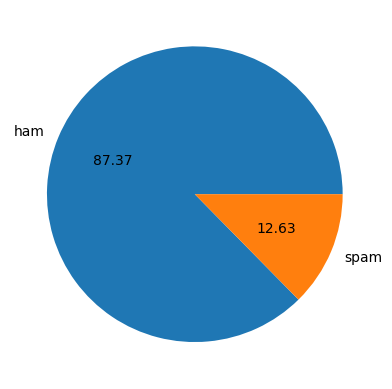

In [21]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences',]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences',]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences',]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

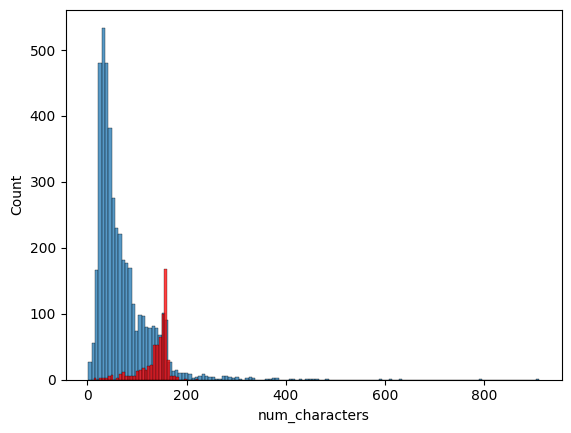

In [32]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

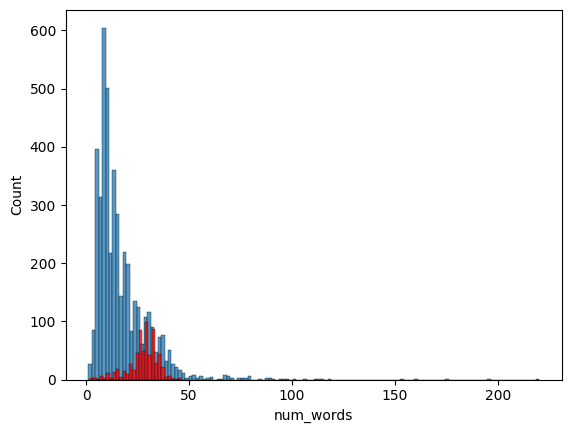

In [33]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

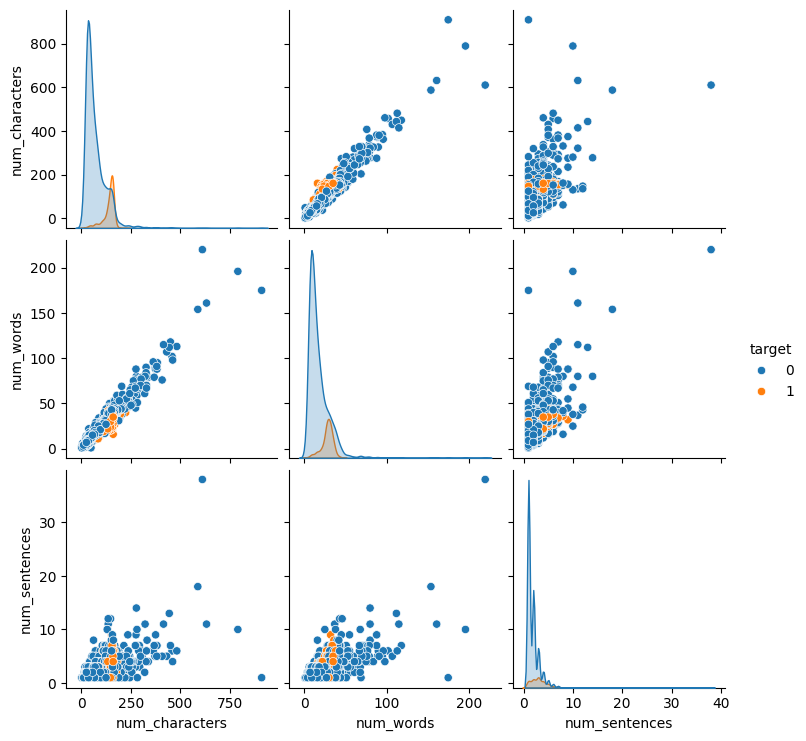

In [34]:
sns.pairplot(df,hue='target')

Again Data Clining for some error

In [35]:
#df.info()
#df.drop(columns=['text'],inplace=True)
#df.info()

In [36]:
#sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
   * Lower case
   * Tokenization
   * Removing spacial charecters
   * Removing stop words and punctuation
   * stemming

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [38]:
ps = PorterStemmer()

In [39]:
transform_text('did you like my presenttation on ml')

'like presentt ml'

In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
df['transform_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

In [45]:
#plt.figure(figsize=(15,6))
#plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

In [47]:
#plt.figure(figsize=(15,6))
#plt.imshow(ham_wc)

4. Model Building

In [48]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [50]:
x.shape

(5169, 3000)

In [51]:
y = df['target'].values

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[788 117]
 [ 24 105]]
0.47297297297297297


In [55]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[904   1]
 [ 32  97]]
0.9897959183673469


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print("Multinomial Naive Bayes Model Performance:")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Multinomial Naive Bayes Model Performance:
[[904   1]
 [ 32  97]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       905
           1       0.99      0.75      0.85       129

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



In [57]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[901   4]
 [ 24 105]]
0.963302752293578


#tfidf --- mnb

Model Improve
1. Change the max_features parameter of TfIdf

In [58]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

Final Accuracy on Test Data: 0.9748549323017408
Confusion Matrix:
 [[875  14]
 [ 12 133]]
Precision Score: 0.9047619047619048


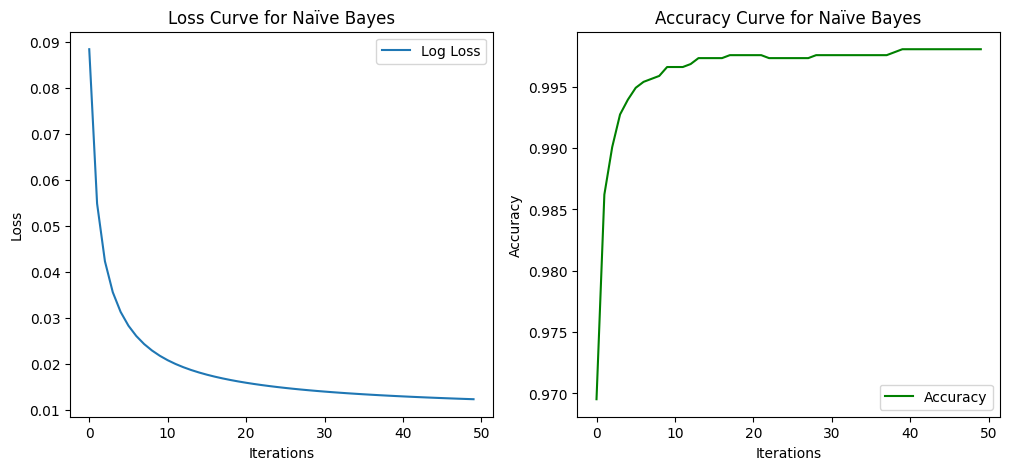

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['transform_text'] contains text data and df['target'] has labels
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['transform_text']).toarray()
y = df['target'].values

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize MultinomialNB with partial fitting
mnb = MultinomialNB()

loss_values = []
accuracy_values = []

# Training in increments
for i in range(50):  # Simulate 50 iterations of incremental learning
    mnb.partial_fit(x_train, y_train, classes=np.unique(y))  # Use `classes` to ensure all labels are considered
    y_pred_proba = mnb.predict_proba(x_train)  # Get probability estimates
    y_pred = mnb.predict(x_train)

    loss = log_loss(y_train, y_pred_proba)  # Compute log loss
    acc = accuracy_score(y_train, y_pred)  # Compute accuracy

    loss_values.append(loss)
    accuracy_values.append(acc)

# Evaluate the final model on test data
y_pred2 = mnb.predict(x_test)
print("Final Accuracy on Test Data:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(loss_values, label="Log Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve for Naïve Bayes")
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label="Accuracy", color='green')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve for Naïve Bayes")
plt.legend()

plt.show()
